## Observations and Insights

- The correlation of the mouse weight to tumor volume is 0.84 which indicates that weight is a heavily weighing factor of the study. This may alter how drugs affect the mice of more weight vs less weight.

- while capomulin and ramunicane are both in the same general area in the box and whisker chart, capomulin had more data points lessening the tumor size than ramunicane

- looking at mouse x401 on the capomulin treatment, it can be said that capomulin is highly effective at lessening tumor volume


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
total = pd.merge(mouse_metadata,study_results,on="Mouse ID", how = "outer")

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug = total.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = drug.mean()
median = drug.median()
variance = drug.var()
stddev = drug.std()
sem = drug.sem()
statistics = pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Standard Deviation":stddev,"SEM":sem})
statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Times')

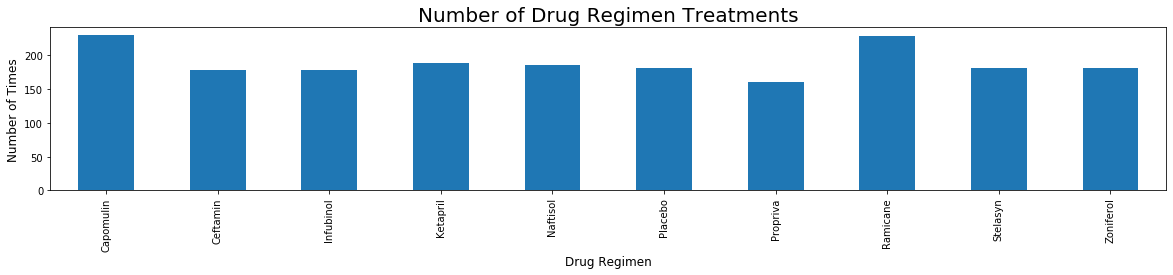

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drugs = drug.count()
plot = drugs.plot(kind="bar", figsize=(20,3))
plot.set_title("Number of Drug Regimen Treatments",fontsize=20)
plot.set_xlabel("Drug Regimen", fontsize=12)
plot.set_ylabel("Number of Times", fontsize=12)

Text(0, 0.5, 'Number of Times')

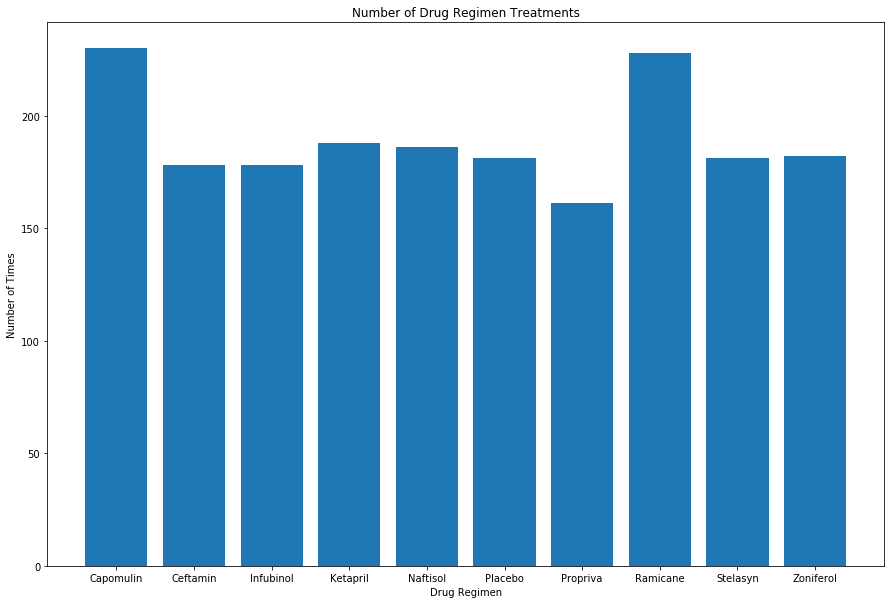

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
        'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.figure(figsize=(15,10))
plt.bar(x_axis,drugs)
plt.title("Number of Drug Regimen Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Times")

## Pie plots

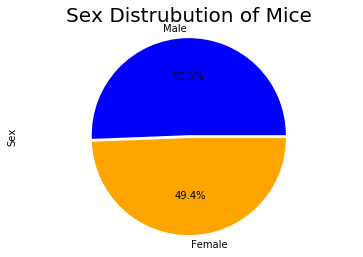

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = total["Sex"].value_counts()
gender.plot(kind="pie",colors=["blue","orange"],explode=(0,0.03),autopct="%1.1f%%")
plt.title("Sex Distrubution of Mice",fontsize=20)
plt.axis("equal")
plt.show()

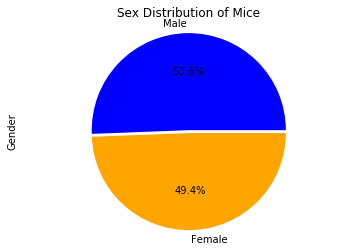

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender,labels=["Male","Female"],colors=["blue","orange"],explode=(0,0.03),autopct="%1.1f%%")
plt.title("Sex Distribution of Mice")
plt.axis("equal")
plt.ylabel("Gender")
plt.show()

## Quartiles, outliers and boxplots

In [58]:
data=total.groupby("Mouse ID").max()

data=data.reset_index()
data1=data[["Mouse ID","Timepoint"]].merge(total,on=["Mouse ID","Timepoint"],how="left")
data1

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [47]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
capomulinfinal = data1.loc[data1["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
capomulinfinal_df = pd.DataFrame(capomulinfinal)
quartiles = capomulinfinal.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin final tumor Volume is: {lowerq}")
print(f"The upper quartile of Capomulin final tumor Volume is: {upperq}")
print(f"The interquartile range of Capomulin final tumor Volume is: {iqr}")
print(f"The the median of Capomulin final tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")
print("This value is the only data point that is an OUTLIER for the Capomulin Tumor Volume (mm3) series")
print("------------------------------------------------------------------------------------------------")
print(capomulinfinal_df.loc[(capomulinfinal_df["Tumor Volume (mm3)"]< lower_bound)|
                                   (capomulinfinal_df["Tumor Volume (mm3)"]> upper_bound)])
print("No Outliers")

The lower quartile of Capomulin final tumor Volume is: 32.37735684
The upper quartile of Capomulin final tumor Volume is: 40.1592203
The interquartile range of Capomulin final tumor Volume is: 7.781863460000004
The the median of Capomulin final tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


This value is the only data point that is an OUTLIER for the Capomulin Tumor Volume (mm3) series
------------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
No Outliers


In [53]:
ramicanefinal = data1.loc[data1["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
ramicanefinal_df = pd.DataFrame(ramicanefinal)
quartiles = ramicanefinal.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane final tumor Volume is: {lowerq}")
print(f"The upper quartile of Ramicane final tumor Volume is: {upperq}")
print(f"The interquartile range of Ramicane final tumor Volume is: {iqr}")
print(f"The the median of Ramicane final tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")
print("This value is the only data point that is an OUTLIER for the Ramicane Tumor Volume (mm3) series")
print("------------------------------------------------------------------------------------------------")
print(ramicanefinal_df.loc[(ramicanefinal_df["Tumor Volume (mm3)"]< lower_bound)|
                                   (ramicanefinal_df["Tumor Volume (mm3)"]> upper_bound)])
print("No Outliers")

The lower quartile of Ramicane final tumor Volume is: 31.56046955
The upper quartile of Ramicane final tumor Volume is: 40.65900627
The interquartile range of Ramicane final tumor Volume is: 9.098536719999998
The the median of Ramicane final tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


This value is the only data point that is an OUTLIER for the Ramicane Tumor Volume (mm3) series
------------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
No Outliers


In [54]:
Ceftaminfinal = data1.loc[data1["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
Ceftaminfinal_df = pd.DataFrame(Ceftaminfinal)
quartiles = Ceftaminfinal.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin final tumor Volume is: {lowerq}")
print(f"The upper quartile of Ceftamin final tumor Volume is: {upperq}")
print(f"The interquartile range of Ceftamin final tumor Volume is: {iqr}")
print(f"The the median of Ceftamin final tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")
print("This value is the only data point that is an OUTLIER for the Ceftamin Tumor Volume (mm3) series")
print("------------------------------------------------------------------------------------------------")
print(Ceftaminfinal_df.loc[(Ceftaminfinal_df["Tumor Volume (mm3)"]< lower_bound)|
                                   (Ceftaminfinal_df["Tumor Volume (mm3)"]> upper_bound)])
print("No Outliers")

The lower quartile of Ceftamin final tumor Volume is: 48.72207785
The upper quartile of Ceftamin final tumor Volume is: 64.29983003
The interquartile range of Ceftamin final tumor Volume is: 15.577752179999997
The the median of Ceftamin final tumor Volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


This value is the only data point that is an OUTLIER for the Ceftamin Tumor Volume (mm3) series
------------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
No Outliers


In [52]:
Infubinolfinal = data1.loc[data1["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
Infubinolfinal_df = pd.DataFrame(Infubinolfinal)
quartiles = Infubinolfinal.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol final tumor Volume is: {lowerq}")
print(f"The upper quartile of Infubinol final tumor Volume is: {upperq}")
print(f"The interquartile range of Infubinol final tumor Volume is: {iqr}")
print(f"The the median of Infubinol final tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")
print("This value is the only data point that is an OUTLIER for the Infubinol Tumor Volume (mm3) series")
print("------------------------------------------------------------------------------------------------")
print(Infubinolfinal_df.loc[(Infubinolfinal_df["Tumor Volume (mm3)"]< lower_bound)|
                                   (Infubinolfinal_df["Tumor Volume (mm3)"]> upper_bound)])
print("No Outliers")

The lower quartile of Infubinol final tumor Volume is: 54.04860769
The upper quartile of Infubinol final tumor Volume is: 65.52574285
The interquartile range of Infubinol final tumor Volume is: 11.477135160000003
The the median of Infubinol final tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


This value is the only data point that is an OUTLIER for the Infubinol Tumor Volume (mm3) series
------------------------------------------------------------------------------------------------
    Tumor Volume (mm3)
31           36.321346
No Outliers


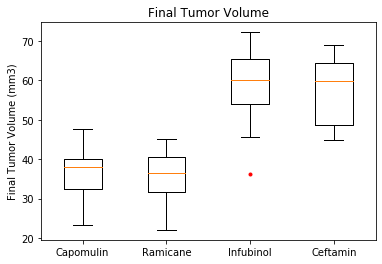

37

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(x=(capomulinfinal_df["Tumor Volume (mm3)"],ramicanefinal_df["Tumor Volume (mm3)"],
               Infubinolfinal_df["Tumor Volume (mm3)"],Ceftaminfinal_df["Tumor Volume (mm3)"],
               ), sym="r.")

ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()
37

## Line and scatter plots

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


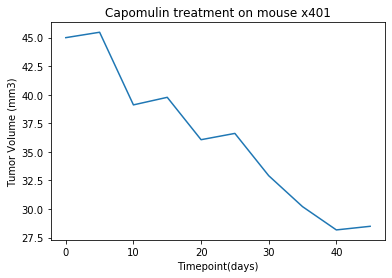

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capline=total[total["Mouse ID"]=="x401"][total["Drug Regimen"]=="Capomulin"]
plt.plot(total[total["Mouse ID"]=="l509"]["Timepoint"],total[total["Mouse ID"]=="x401"]
        ["Tumor Volume (mm3)"])
plt.title("Capomulin treatment on mouse x401")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
capline

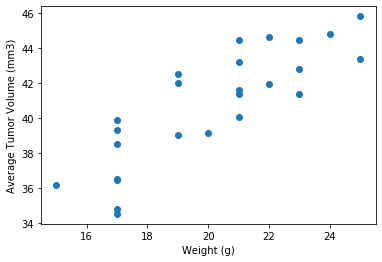

In [62]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scattercap=total[total["Drug Regimen"]=="Capomulin"]
capavg=scattercap.groupby("Mouse ID").mean()
plt.scatter(capavg["Weight (g)"],y=capavg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



The correlation between mouse weight and the average tumor volume is 0.84


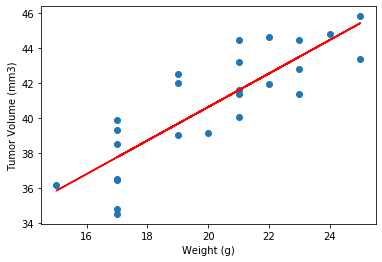

In [64]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg["Weight (g)"],capavg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
figure=st.linregress(capavg["Weight (g)"],capavg["Tumor Volume (mm3)"])
y_values= capavg["Weight (g)"]*figure[0]+figure[1]
plt.scatter(capavg["Weight (g)"],capavg["Tumor Volume (mm3)"])
plt.plot(capavg["Weight (g)"],y_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()